## Binary Digit Recognition

This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes). We will use a neural network to recognize two handwritten digits, zero and one. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading the dataset  which we have already seperated the data in the 'autils' file imported in the packages loaded 

In [2]:
# load dataset
X, y = load_data()

The data set contains 1000 training examples of handwritten digits, here limited to zero and one.
1. Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
2. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
3. Each training example becomes a single row in our data matrix X.
4. This gives us a 1000 x 400 matrix X where every row is a training example of a handwritten digit image.

The second part of the training set is a 1000 x 1 dimensional vector y that contains labels for the training set
y = 0 if the image is of the digit 0, y = 1 if the image is of the digit 1

In [3]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [5]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


### Visualizing the Data
Visualizing a subset of the training set.

In the cell below, the code randomly selects 64 rows from X, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
The label for each image is displayed above the image

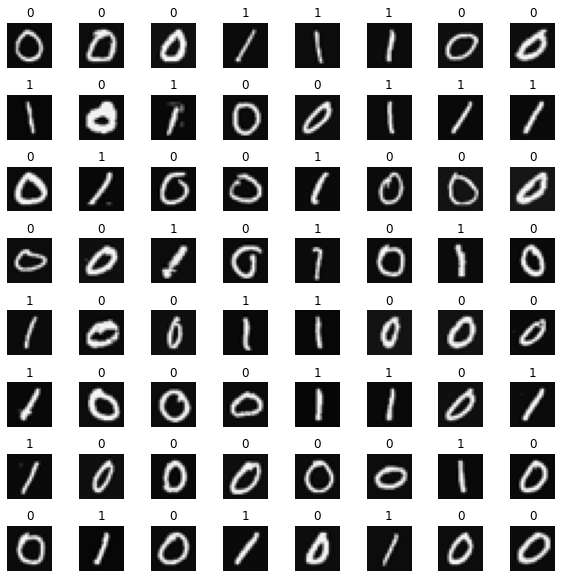

In [6]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Model representation
#### The neural network you will use in this assignment is shown in the figure below.

1. This has three dense layers with sigmoid activations.
2. Recall that our inputs are pixel values of digit images.
3. Since the images are of size  20×20 , this gives us  400  inputs

#### The parameters have dimensions that are sized for a neural network with  25  units in layer 1,  15  units in layer 2 and  1  output unit in layer 3.

Therefore, the shapes of W, and b, are

  layer1: The shape of W1 is (400, 25) and the shape of b1 is (25,)
  layer2: The shape of W2 is (25, 15) and the shape of b2 is: (15,)
  layer3: The shape of W3 is (15, 1) and the shape of b3 is: (1,)


#### Using Keras Sequential model and Dense Layer with a sigmoid activation to construct the network described above.

In [7]:
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        
        Dense(25, activation = 'sigmoid'),
        Dense(15, activation = 'sigmoid'),
        Dense(1, activation = 'sigmoid')
    ], name = "my_model" 
)                            


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [9]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [10]:
[layer1, layer2, layer3] = model.layers

In [11]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [12]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.21651828],
       [-0.24931419],
       [ 0.39648956],
       [-0.19954595],
       [ 0.42164725],
       [-0.10194957],
       [ 0.18264765],
       [-0.53395474],
       [ 0.1902765 ],
       [ 0.407407  ],
       [ 0.07227314],
       [ 0.24101782],
       [ 0.34879792],
       [ 0.35243118],
       [ 0.43604094]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


#### The following code will define a loss function(BinaryCrossentropy) and run gradient descent optimizer (Adam) to fit the weights of the model to the training data.

In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 3s 986us/step - loss: 0.7319
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5712
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4435
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3304
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1976
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1606
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1136
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 13/20
32/32 [============================

To run the model on an example to make a prediction, used Keras predict. The input to predict is an array so the single example is reshaped to be two dimensional.

In [14]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

 predicting a zero: [[0.04757011]]
 predicting a one:  [[0.9852562]]


In [15]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits.

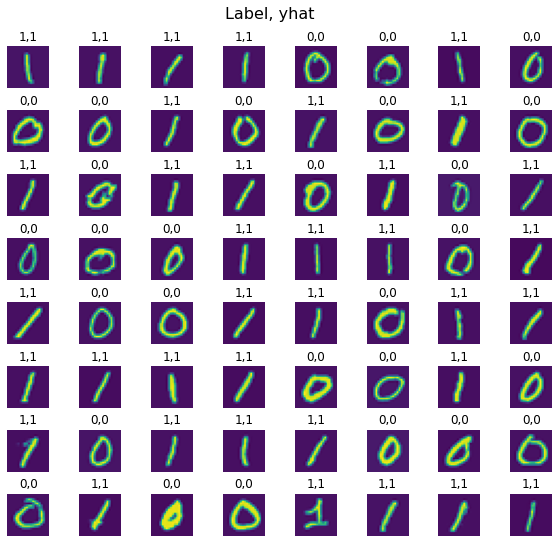

In [16]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='viridis')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

#### It is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network.

In [17]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j]  = g(z)
         
    return(a_out)

In [18]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


The following cell builds a three-layer neural network utilizing the my_dense subroutine above.

In [19]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [20]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [21]:
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


### To compare predictions from both the Numpy model and the Tensorflow model.

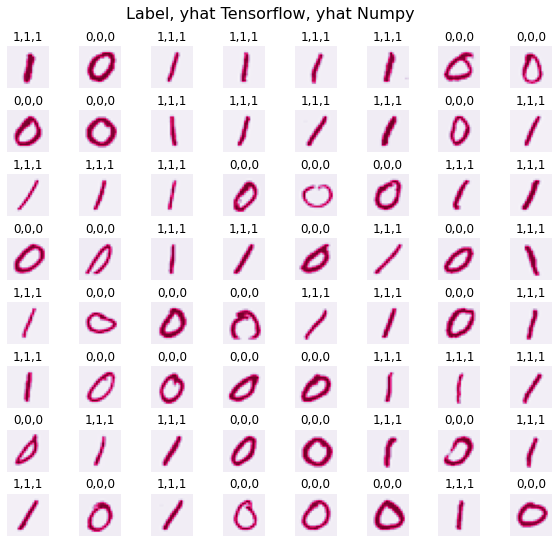

In [22]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='PuRd')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

We can see that the predicted and original values match by both methods (tensorflow and numpy)
## Thank You!!!

